# Elección del modelo a realizar: Regresión Logística

# Pasos de la Actividad

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo
8. Interpretar, analizar y documentar los resultados obtenidos
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
#Cargamos las librerias necesarias

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Se realiza la lectura de datos en Python y estos datos se cargan en la variable Datos

Datos = pd.read_csv('Titanic-Dataset.csv')

In [3]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Descripción de los datos

Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

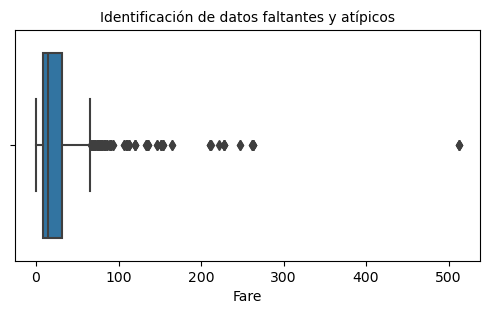

In [5]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de datos faltantes y atípicos', fontsize=10 )

En el gráfico se puede observar que todo esta bien, con respecto a los datos de la columna Fare.

In [6]:
#Revisión de datos faltantes en las columnas que no pueden estar en 0

print("Cantidad de Registros con cero en edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en ticket: ",Datos['Ticket'].isin([0]).sum())
print("Cantidad de Registros con cero en cabina (Cabin): ",Datos['Cabin'].isin([0]).sum())
print("Cantidad de Registros con cero en tarifa (Fare): ",Datos['Fare'].isin([0]).sum())

Cantidad de Registros con cero en edad:  0
Cantidad de Registros con cero en ticket:  0
Cantidad de Registros con cero en cabina (Cabin):  0
Cantidad de Registros con cero en tarifa (Fare):  15


In [7]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna (Fare).

Datos['Fare']=Datos['Fare'].replace(0,Datos['Fare'].mean())

In [8]:
#Revisión nuevamente de datos faltantes en Fare

print("Cantidad de Registros con cero en tarifa (Fare): ",Datos['Fare'].isin([0]).sum())

Cantidad de Registros con cero en tarifa (Fare):  0


In [9]:
#Revisamos 10 datos en Age

Datos[['Age']].head(10)

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


Vemos que los datos estan en decimal, para esto los pasamos a enteros y eliminamos las filas con NaN en la columna Age y en todas las demas columnas. 

In [10]:
# Procedemos primero a eliminar las filas que contienen valores NaN en la columna Age y en las demas columnas de nuestro dataset 

Datos = Datos.dropna()

In [11]:
# Convertirmos los valores decimales en enteros en la columna "Age"

Datos["Age"] = Datos["Age"].astype(int)

In [12]:
# Revisamos si los volores se convirtieron en enteros, para esto vemos los 10 datos en: Age

Datos[['Age']].head(10)

,Age
1,38
3,35
6,54
10,4
11,58
21,34
23,28
27,19
52,49
54,65


Text(0.5, 1.0, 'Identificación de datos atípicos')

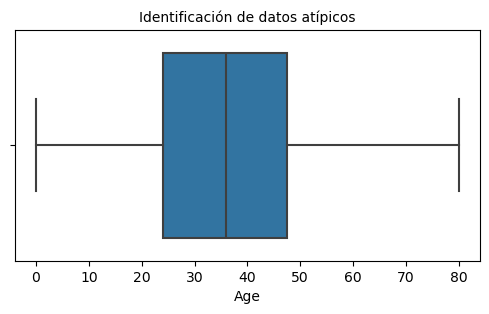

In [13]:
# Ahora identificamos los datos atípicos en: Age

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de datos atípicos', fontsize=10 )

En el gráfico se puede observar que todo esta bien, con respecto a las edades.

# 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [14]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    int32  
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 17.9+ KB


# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [15]:
# Total de personas que sobrevivieron y que no sobrevivieron

Datos['Survived'].value_counts()

Survived
1    123
0     60
Name: count, dtype: int64

El numero 1 representa que si sobrevivio y el numero 0 representa que no sobrevivio.

In [16]:
Datos[['Survived']].head(10)

,Survived
1,1
3,1
6,0
10,1
11,1
21,1
23,1
27,0
52,1
54,0


Seleccionamos **"Survived"** como la caracteristica relevante.

# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [17]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables M y Y para almacenar la información del entrenamiento

M = Datos.drop(['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

Y = Datos['Survived'] # Se cargan los datos de train con los datos de la columna Survived

M_train, M_test, Y_train, Y_test = train_test_split(M, Y, test_size=0.25, stratify=Y, random_state= 0)

In [18]:
print (M_train)

     PassengerId  Pclass  Age  SibSp  Parch      Fare
269          270       1   35      0      0  135.6333
445          446       1    4      0      2   81.8583
230          231       1   35      1      0   83.4750
137          138       1   37      1      0   53.1000
498          499       1   25      1      2  151.5500
..           ...     ...  ...    ...    ...       ...
645          646       1   48      1      0   76.7292
699          700       3   42      0      0    7.6500
218          219       1   32      0      0   76.2917
701          702       1   35      0      0   26.2875
394          395       3   24      0      2   16.7000

[137 rows x 6 columns]


In [19]:
print (Y_train)

269    1
445    1
230    1
137    0
498    0
      ..
645    1
699    0
218    1
701    1
394    1
Name: Survived, Length: 137, dtype: int64


# 5.Entrenar el modelo configurando los diferentes hiperparámetros

In [20]:
# Construimos el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (M_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(M_test) 

In [21]:
print (Y_test)

435    1
136    1
262    0
292    0
599    1
345    1
581    1
473    1
209    1
151    1
96     0
1      1
748    0
251    0
520    1
62     0
737    1
487    0
6      0
21     1
193    1
329    1
671    0
23     1
118    0
309    1
887    1
853    1
621    1
625    0
3      1
341    1
325    1
505    0
273    0
370    1
742    1
759    1
630    1
689    1
662    0
751    1
809    1
460    1
782    0
319    1
Name: Survived, dtype: int64


In [22]:
print (Prediccion)

[1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1]


# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [23]:
# Comprobamos el desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40        15
           1       0.72      0.84      0.78        31

    accuracy                           0.67        46
   macro avg       0.61      0.59      0.59        46
weighted avg       0.65      0.67      0.65        46



# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

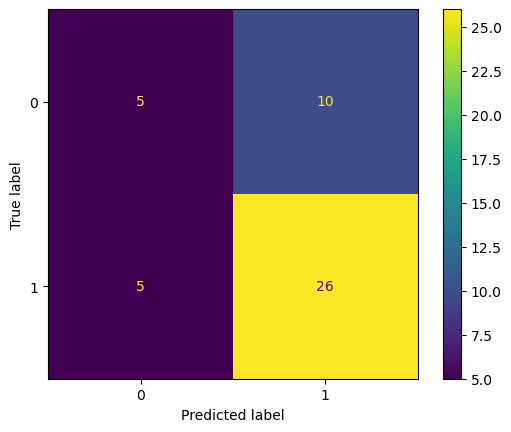

In [24]:
# Se procede a crear una matrix de confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

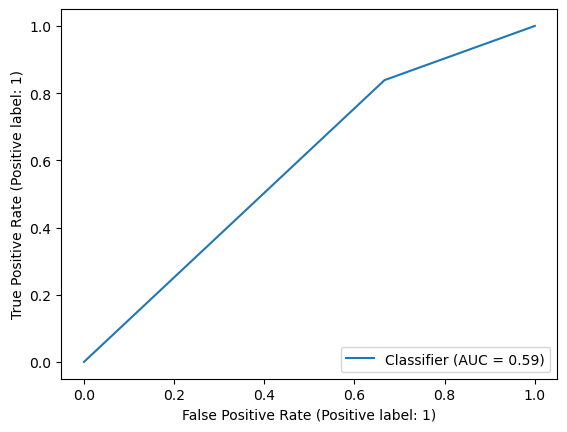

In [25]:
# Creamos una curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

# 8. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir:

Precisión: La precisión para la clase "Survived" es de 0.50, lo que significa que el 50% de las predicciones positivas del modelo para esta clase fueron correctas.

Recall: El recall para la clase "Survived" es de 0.84, indicando que el modelo identificó correctamente al 84% de todos los sobrevivientes.

F1 Score: El F1 Score para la clase "Survived" es de 0.78, lo que refleja un equilibrio entre precisión y recall. El F1 Score combina ambas métricas en una sola, y un valor de 0.78 sugiere que el modelo tiene un buen desempeño en ambos aspectos.

Interpretación de la matriz de confusión:

La matriz de confusión revela que en el recuadro violeta superior, el número 5 significa que el algoritmo predijo correctamente en 5 ocasiones que la persona no sobrevivió. En el recuadro amarillo, el número 26 indica que el algoritmo predijo correctamente en 26 ocasiones que la persona sobrevivió. En el recuadro violeta inferior, el número 5 muestra que el algoritmo predijo que 5 personas no sobrevivieron, pero en realidad sí sobrevivieron. Finalmente, en el recuadro azul, el número 10 indica que el algoritmo predijo que 10 personas sobrevivieron, pero en realidad no sobrevivieron.

De la curva de precisión del modelo se puede interpretar:

El (AUC) es de 0.59. Esto significa que el modelo tiene un rendimiento moderado, pero que podría mejorarse.

# 9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/